In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load training dataset and split it into X and y vector
train = np.loadtxt('group15_train.txt')
X = train[:, 0:2]
y = train[:, 2]
val = np.loadtxt('group15_val.txt')
X_val = val[:, 0:2]
y_val = val[:, 2]
test = np.loadtxt('group15_test.txt')
X_test = test[:, 0:2]
y_test = test[:, 2]
d = X.shape[1]

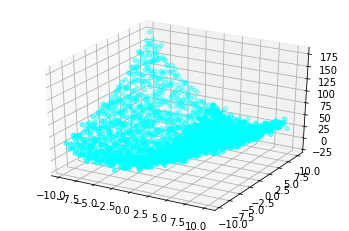

In [3]:
# simply visualising 3d data
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], y, color='cyan')

In [4]:
# Set hyperparameter p
p = 2

In [5]:
# Generate Design Matrix Z
Z = np.ones((X.shape[0], (p+1)**d))
Z_val = np.ones((X_val.shape[0], (p+1)**d))
Z_test = np.ones((X_test.shape[0], (p+1)**d))
k = 0
# d number of nested loops will come here
for i in range(0, p+1):
    for j in range(0, p+1):
        Z[:, k] = np.multiply(np.power(X[:, 0], i), np.power(X[:, 1], j))
        Z_val[:, k] = np.multiply(np.power(X_val[:, 0], i), np.power(X_val[:, 1], j))
        Z_test[:, k] = np.multiply(np.power(X_test[:, 0], i), np.power(X_test[:, 1], j))
        k = k+1


In [6]:
# Learn parameters
W = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(Z), Z)), np.transpose(Z)), y)

In [7]:
# make predictions
y_prediction = np.dot(W, Z.T)
y_val_prediction = np.dot(W, Z_val.T)
y_test_prediction = np.dot(W, Z_test.T)

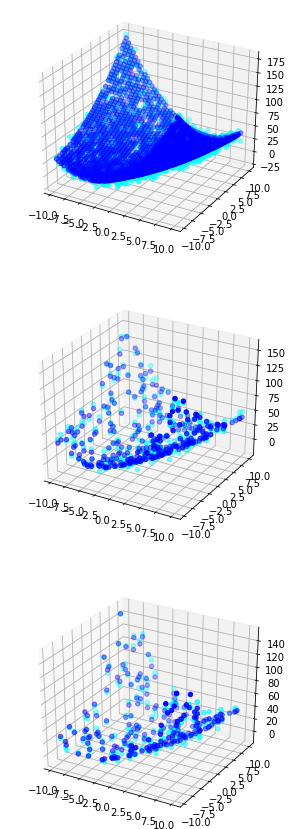

In [8]:
# visualise training data and linear fit
plt.rcParams['figure.figsize'] = [5, 15]
fig = plt.figure()
ax = fig.add_subplot(311, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], y, color='cyan')
ax.scatter(X[:, 0], X[:, 1], y_prediction, color='blue')
ax = fig.add_subplot(312, projection = '3d')
ax.scatter(X_val[:, 0], X_val[:, 1], y_val, color='cyan')
ax.scatter(X_val[:, 0], X_val[:, 1], y_val_prediction, color='blue')
ax = fig.add_subplot(313, projection = '3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='cyan')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test_prediction, color='blue')

In [9]:
# Performance check
trainlossRMS = np.sqrt(np.mean(np.square(y_prediction-y)))
vallossRMS = np.sqrt(np.mean(np.square(y_val_prediction-y_val)))
testlossRMS = np.sqrt(np.mean(np.square(y_test_prediction-y_test)))
{'train loss': trainlossRMS, 'validation loss': vallossRMS, 'test loss': testlossRMS}

{'train loss': 6.073818346197497,
 'validation loss': 5.597161457410529,
 'test loss': 6.285295852198664}

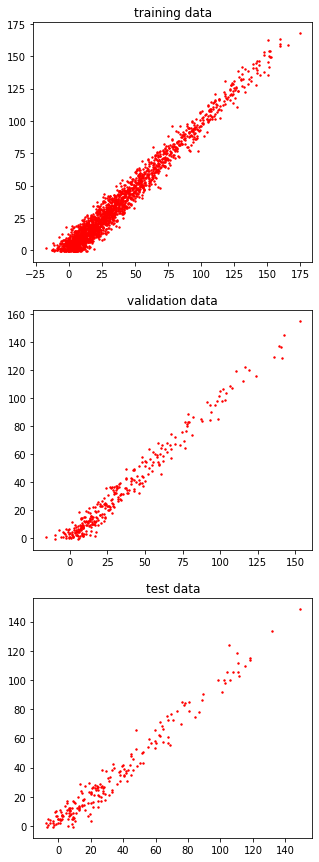

In [10]:
# Scatter plot
plt.rcParams['figure.figsize'] = [5, 15]
fig, axs = plt.subplots(3, 1)
axs[0].set_title('training data')
axs[0].scatter(y, y_prediction, s = 2, color = 'red')
axs[1].set_title('validation data')
axs[1].scatter(y_val, y_val_prediction, s = 2, color = 'red')
axs[2].set_title('test data')
axs[2].scatter(y_test, y_test_prediction, s = 2, color = 'red')

{'train loss': 34.02253114188114, 'validation loss': 32.90315330202779}
{'train loss': 25.12007996514127, 'validation loss': 25.89730087104877}
{'train loss': 6.073818346197497, 'validation loss': 5.597161457410529}
{'train loss': 6.063860068491306, 'validation loss': 5.617524201457196}
{'train loss': 6.050412871297771, 'validation loss': 5.666960358692301}
{'train loss': 8.098754669892863, 'validation loss': 8.009352076791323}
{'train loss': 10.640076692094674, 'validation loss': 11.326166314881112}
{'train loss': 21.246987297315528, 'validation loss': 20.050594397212155}
{'train loss': 23.533019478891074, 'validation loss': 24.498869450970677}
{'train loss': 30.185725082305325, 'validation loss': 29.550344508408813}
{'train loss': 30.537780024323343, 'validation loss': 30.574316865408967}


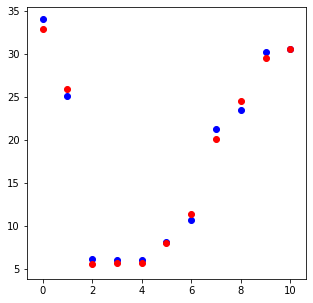

In [11]:
# Linear Search for best hyperparameter
p_min = 0
p_max = 10
verbose = True

TrainLoss = []
ValLoss = []
for p in range(p_min, p_max+1):
    # Append column X^p to Design Matrix Z
    Z = np.ones((X.shape[0], (p+1)**d))
    Z_val = np.ones((X_val.shape[0], (p+1)**d))
    if p > 0:
        # Generate Design Matrix Z
        k = 0
        # d number of nested loops will come here
        for i in range(0, p+1):
            for j in range(0, p+1):
                Z[:, k] = np.multiply(np.power(X[:, 0], i), np.power(X[:, 1], j))
                Z_val[:, k] = np.multiply(np.power(X_val[:, 0], i), np.power(X_val[:, 1], j))
                k = k+1
        
    # Learn parameters
    W = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(Z), Z)), np.transpose(Z)), y)
    # make predictions
    y_prediction = np.dot(W, Z.T)
    y_val_prediction = np.dot(W, Z_val.T)
    # Performance check
    trainlossRMS = np.sqrt(np.mean(np.square(y_prediction-y)))
    vallossRMS = np.sqrt(np.mean(np.square(y_val_prediction-y_val)))
    if verbose:
        print({'train loss': trainlossRMS, 'validation loss': vallossRMS})
    TrainLoss.append(trainlossRMS)
    ValLoss.append(vallossRMS)
# visualise training error and validation error
plt.rcParams['figure.figsize'] = [5, 5]
plt.scatter(range(p_min, p_max+1), TrainLoss, color = 'blue')
plt.scatter(range(p_min, p_max+1), ValLoss, color = 'red')